<a id='intro'></a>
## Introduction

> The tmdb-movies dataset is taken from the database website, tmdb, which catalogs movies based on a number of characteristics. You can see some of these in the columns below. The goal of this analysis is to determine what factors are associated with a movies popularity score. We'll be looking at budget, revenue, release year, and vote average. Please note that this analysis will not feature in-depth statistical analysis and should be viewed as tentative until explored at a deeper level. 
> We will explore associaton of budget and revenue and if there is an association there, do either of these more strongly associate with popularity score?
> We will look at popularity over time. Does this increase? Does vote average also increase? 



In [10]:
#Import Libraries
import pandas as pd
import matplotlib as mp
import numpy as np
#Use magic word to keep visualizations inline. 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [11]:
#Load Data Set
df = pd.read_csv('tmdb-movies.csv')
#Make Sure Data Set Came Through
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

When looking at the dataframe we can see that there are quite a few columns with data that we won't be investigating as well as some missing datapoints. We will clean our data by creating a subset of popularity, budget, revenue, director, release year, and vote average. After this, we will further subset the data so that only lines with all non-nulls are included in the dataframe. 

### Data Cleaning 

In [13]:
df = df[['popularity', 'budget', 'revenue', 'release_year','vote_average']]
df.head()

,popularity,budget,revenue,release_year,vote_average
0,32.985763,150000000,1513528810,2015,6.5
1,28.419936,150000000,378436354,2015,7.1
2,13.112507,110000000,295238201,2015,6.3
3,11.173104,200000000,2068178225,2015,7.5
4,9.335014,190000000,1506249360,2015,7.3


In [14]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
release_year    10866 non-null int64
vote_average    10866 non-null float64
dtypes: float64(2), int64(3)
memory usage: 424.5 KB


After creating the subset dataframe with only the columns we are using in our analysis, df.info() was run in order to find lines with nulls. We have a complete data set that is not missing any data. 

In [15]:
df.describe()

,popularity,budget,revenue,release_year,vote_average
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,2001.322658,5.974922
std,1.000185,3.091321e+07,1.170035e+08,12.812941,0.935142
min,0.000065,0.000000e+00,0.000000e+00,1960.000000,1.500000
25%,0.207583,0.000000e+00,0.000000e+00,1995.000000,5.400000
50%,0.383856,0.000000e+00,0.000000e+00,2006.000000,6.000000
75%,0.713817,1.500000e+07,2.400000e+07,2011.000000,6.600000
max,32.985763,4.250000e+08,2.781506e+09,2015.000000,9.200000


In [34]:
df = df[df['budget']>0]
df = df[df['revenue']>0]
df.describe()

,popularity,budget,revenue,release_year,vote_average
count,3668.000000,3.668000e+03,3.668000e+03,3668.000000,3668.000000
mean,0.973516,3.424959e+07,8.916398e+07,2000.970011,6.129089
std,0.722589,3.699360e+07,1.269146e+08,11.278253,0.772228
min,0.001117,1.130000e+02,2.000000e+00,1960.000000,3.300000
25%,0.451484,1.000000e+07,1.310825e+07,1995.000000,5.600000
50%,0.774668,2.200000e+07,4.169099e+07,2004.000000,6.200000
75%,1.277945,4.600000e+07,1.139764e+08,2010.000000,6.700000
max,3.644541,4.250000e+08,1.123747e+09,2015.000000,8.400000


In [35]:
grouped = df.groupby(['release_year'], as_index = False)[['budget']].min()
print(grouped)

    release_year   budget
0           1960   806948
1           1961   200000
2           1962   500000
3           1963  2500000
4           1964   500000
5           1965  5600000
6           1966  3000000
7           1967  2000000
8           1968   950000
9           1969  3600000
10          1970  2200000
11          1971   725000
12          1972    12000
13          1973   500000
14          1974    85000
15          1975   400000
16          1976  1100000
17          1977    10000
18          1978   300000
19          1979   300000
20          1980   550000
21          1981   350000
22          1982  1000000
23          1983   425000
24          1984   800000
25          1985      114
26          1986      113
27          1987   250000
28          1988  1200000
29          1989   500000
30          1990   500000
31          1991  6000000
32          1992   220000
33          1993   900000
34          1994    27000
35          1995   500000
36          1996   200000
37          

Removed any budgets or revenue equaling 0 (which may indicate unknowns). Anything greater than 0 was left as this may be a known variable.

When we look at popularity, there are values outside 3 standard deviations of the mean. This indicates outliers. We will get exact outlier ranges next.

In [17]:
def UpperThreeStandards (mean, std):
    outlierBound = float(mean+(3*std))
    print(outlierBound)
    return;

popOutlierUpper = UpperThreeStandards(.646441,1.000185)
budgetOutlierUpper = UpperThreeStandards(14625700,30913210)
revenueOutlierUpper = UpperThreeStandards(39823320,117003500)
voteAvgOutlierUpper = UpperThreeStandards(5.974922,0.935142)

def LowerThreeStandards (mean, std):
    outlierBound = float(mean-(3*std))
    print(outlierBound)
    return;

popOutlierLower = LowerThreeStandards(.646441,1.000185)
budgetOutlierLower = LowerThreeStandards(14625700,30913210)
revenueOutlierLower = LowerThreeStandards(39823320,117003500)
voteAvgOutlierLower = LowerThreeStandards(5.974922,0.935142)


3.6469960000000006
107365330.0
390833820.0
8.780348
-2.354114
-78113930.0
-311187180.0
3.169496


I created two functions. One that that would tell me the upper bound for outliers and one that would tell me the lower bound. These will now be used to remove outliers. 

In [18]:
df.describe()

,popularity,budget,revenue,release_year,vote_average
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.00000
mean,1.191400,3.720183e+07,1.076589e+08,2001.263294,6.16786
std,1.475002,4.220291e+07,1.765248e+08,11.281989,0.79504
min,0.001117,1.000000e+00,2.000000e+00,1960.000000,2.20000
25%,0.462448,1.000000e+07,1.357645e+07,1995.000000,5.70000
50%,0.797298,2.400000e+07,4.479322e+07,2004.000000,6.20000
75%,1.368245,5.000000e+07,1.241530e+08,2010.000000,6.70000
max,32.985763,4.250000e+08,2.781506e+09,2015.000000,8.40000


Here we can see that popularity has some upper outliers, vote_average has some lower and upper outliers. Now we remove the data lines with outliers. 

In [19]:
df = df[df['popularity']<3.6469960000000006]
df = df[df['vote_average']<8.780348]
df = df[df['vote_average']>3.169496]

df.describe()

,popularity,budget,revenue,release_year,vote_average
count,3688.000000,3.688000e+03,3.688000e+03,3688.000000,3688.000000
mean,0.970529,3.406386e+07,8.868113e+07,2000.967191,6.127928
std,0.722098,3.697880e+07,1.267388e+08,11.274096,0.772272
min,0.001117,1.000000e+00,2.000000e+00,1960.000000,3.300000
25%,0.449456,9.000000e+06,1.282086e+07,1995.000000,5.600000
50%,0.773303,2.200000e+07,4.139384e+07,2004.000000,6.200000
75%,1.273618,4.500000e+07,1.132875e+08,2010.000000,6.700000
max,3.644541,4.250000e+08,1.123747e+09,2015.000000,8.400000


This is the dataframe we will be using. There are no nulls and 6 columns of data and no outliers. 

<a id='eda'></a>
## Exploratory Data Analysis

### Associations between buget, revenue, and popularity. 
> We will explore associaton of budget and revenue and if there is an association there, do either of these more strongly associate with popularity score?


[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Popularity'),
 Text(0.5,1,'Popularity Frequency')]

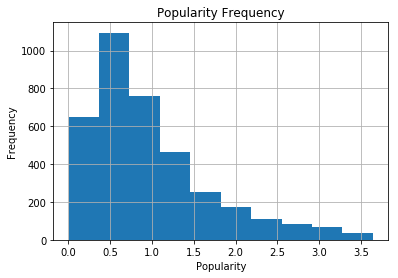

In [20]:
hist = df['popularity'].hist()
hist.set(xlabel="Popularity", ylabel="Frequency", title= "Popularity Frequency")

When looking at the popularity histogram, we can see that it is heavily skewed to the right. This indicates that I may want to check for outliers and look at the descriptive statistics for this column. When looking at the imdb website, I can see that there is an 'infinite' popularity number and so there aren't any true outliers to exclude. 

In [21]:
df.describe()

,popularity,budget,revenue,release_year,vote_average
count,3688.000000,3.688000e+03,3.688000e+03,3688.000000,3688.000000
mean,0.970529,3.406386e+07,8.868113e+07,2000.967191,6.127928
std,0.722098,3.697880e+07,1.267388e+08,11.274096,0.772272
min,0.001117,1.000000e+00,2.000000e+00,1960.000000,3.300000
25%,0.449456,9.000000e+06,1.282086e+07,1995.000000,5.600000
50%,0.773303,2.200000e+07,4.139384e+07,2004.000000,6.200000
75%,1.273618,4.500000e+07,1.132875e+08,2010.000000,6.700000
max,3.644541,4.250000e+08,1.123747e+09,2015.000000,8.400000


Looking at the popularity statistic, I could exclude the any popularity over 3 standard deviations over the mean. However, because this lesson hasn't yet gotten to those types of statistics, I will leave it. 

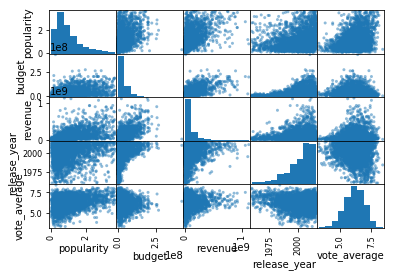

In [22]:
 pd.plotting.scatter_matrix(df);

[Text(0,0.5,'Frequency'), Text(0.5,0,'Budget'), Text(0.5,1,'Budget Frequency')]

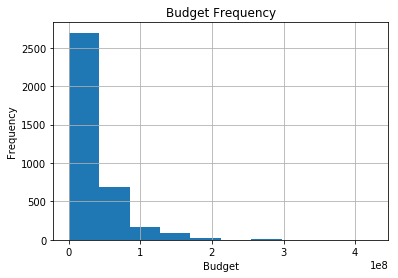

In [23]:
hist = df['budget'].hist()
hist.set(xlabel="Budget", ylabel="Frequency", title= "Budget Frequency")

[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Revenue'),
 Text(0.5,1,'Revenue Frequency')]

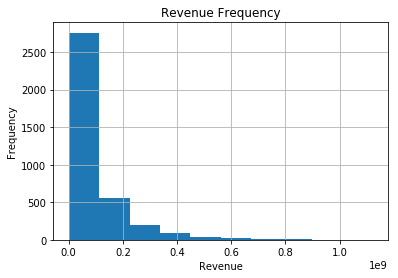

In [24]:
hist = df['revenue'].hist()
hist.set(xlabel="Revenue", ylabel="Frequency", title= "Revenue Frequency")

Looking at the distribution of the three columns, popularity, revenue, and budget - we can see that they are distributed in similar manners. Next we'll look at the association between revenue and budget as well as the two associations with popularity. 

In our scatter matrix above, we can see that revenue and budget have a positive correlation though not as strong when budget or revenue are in the higher realms. 

We can also look at the correlation scatter plots between budget and popularity and revenue and popularity. It appears that budget has a greater positive association with popularity (wider on the y axis and narrower on the x axis) than revenue does with popularity (wider on the x axis). 

To confirm the association between budget, revenue, and poularity we'll want to look at the correlation coefficients.

In [25]:
df.corr()

,popularity,budget,revenue,release_year,vote_average
popularity,1.000000,0.423575,0.569654,0.161443,0.295601
budget,0.423575,1.000000,0.644670,0.238407,-0.057118
revenue,0.569654,0.644670,1.000000,0.098915,0.143855
release_year,0.161443,0.238407,0.098915,1.000000,-0.163657
vote_average,0.295601,-0.057118,0.143855,-0.163657,1.000000


We can confirm the positive correlation between budget and revenue, correlated at .73. 

We can see that my visual assumption was wrong that budget had a higher correlation with popularity. Budget is associated with popularity at .55 and revenue is associated with popularity at .66. 

### Research Question 2  (Replace this header name!)
> We will look at popularity over time. Does this increase? Does vote average also increase?

In [26]:
grouped = df.groupby(['release_year'], as_index = False)[['popularity']].max()
print(grouped)

    release_year  popularity
0           1960    2.610362
1           1961    2.631987
2           1962    3.170651
3           1963    2.508235
4           1964    3.153791
5           1965    1.910465
6           1966    0.670274
7           1967    2.550704
8           1968    3.309196
9           1969    1.778746
10          1970    1.936962
11          1971    3.072555
12          1972    0.949381
13          1973    2.272486
14          1974    3.264571
15          1975    3.258151
16          1976    2.582657
17          1977    2.379469
18          1978    1.697618
19          1979    2.319520
20          1980    2.432001
21          1981    1.947170
22          1982    2.900556
23          1983    3.178818
24          1984    2.556799
25          1985    2.834739
26          1986    2.485419
27          1987    3.474728
28          1988    2.150682
29          1989    3.536655
30          1990    2.679627
31          1991    3.584406
32          1992    2.248239
33          19

In [27]:
grouped2 = df.groupby(['release_year'])[['popularity']].max()
print(grouped2)

              popularity
release_year            
1960            2.610362
1961            2.631987
1962            3.170651
1963            2.508235
1964            3.153791
1965            1.910465
1966            0.670274
1967            2.550704
1968            3.309196
1969            1.778746
1970            1.936962
1971            3.072555
1972            0.949381
1973            2.272486
1974            3.264571
1975            3.258151
1976            2.582657
1977            2.379469
1978            1.697618
1979            2.319520
1980            2.432001
1981            1.947170
1982            2.900556
1983            3.178818
1984            2.556799
1985            2.834739
1986            2.485419
1987            3.474728
1988            2.150682
1989            3.536655
1990            2.679627
1991            3.584406
1992            2.248239
1993            2.571339
1994            2.536898
1995            3.440238
1996            3.293387
1997            3.488910


[Text(0,0.5,'Max Popularity Score'),
 Text(0.5,0,'Year Released'),
 Text(0.5,1,'Max Popularity over Time')]

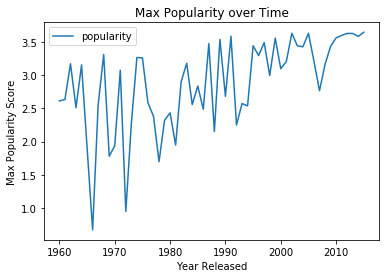

In [28]:
plot = grouped2.plot();
plot.set(xlabel="Year Released", ylabel="Max Popularity Score", title= "Max Popularity over Time")

As year increases the max popularity also increases. Here, we can see that the max popularity for the whole set occurs in 2015. 

In [29]:
grouped3 = df.groupby(['release_year'])[['vote_average']].max()
print(grouped3)

              vote_average
release_year              
1960                   8.0
1961                   7.5
1962                   7.7
1963                   7.5
1964                   7.7
1965                   7.2
1966                   7.5
1967                   7.6
1968                   7.7
1969                   7.2
1970                   7.3
1971                   7.7
1972                   7.7
1973                   7.7
1974                   8.1
1975                   8.0
1976                   7.8
1977                   7.6
1978                   7.5
1979                   7.8
1980                   7.9
1981                   7.4
1982                   7.5
1983                   7.8
1984                   8.4
1985                   7.6
1986                   7.6
1987                   7.7
1988                   7.4
1989                   7.9
1990                   8.0
1991                   7.9
1992                   7.5
1993                   8.1
1994                   7.3
1

[Text(0,0.5,'Max Vote Average'),
 Text(0.5,0,'Year Released'),
 Text(0.5,1,'Max Vote Over Time')]

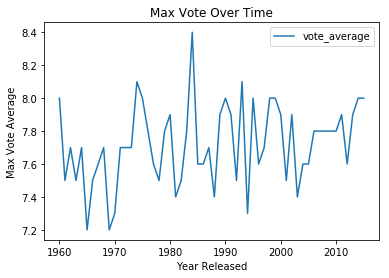

In [30]:
plot = grouped3.plot();
plot.set(xlabel="Year Released", ylabel="Max Vote Average", title= "Max Vote Over Time")

Here, we see that as release year increases so does vote average. We can determine that time does have a postivie association with popularity and vote_average. However, it does not follow the same path as vote_average. This makes sense because from our correlation chart, we can see they only correlate at the .2 level.  

<a id='conclusions'></a>
## Conclusions

>We found that revenue and budget are correlated but there is a stronger correlation between popularity and revenue. There needs to be more statistical test to determine if popularity is what directly leads to more revenue. We also found that time progression has a strong association with both popularity and vote average. However, the time association is not the same pattern for both. One limitation fo this analysis is lack of clarity on how popularity score is calculated. Currently, we cannot tell the exact relationship between popularity and vote average but could be firmer in our conclusions if we had this information. 


